# Here we make a Random Forest Model For Picoeukaryote


In [13]:
# Running model preperation notebook that has a function we need to call
%run /Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/python/04_Populations-model-fitting/01_model-preparation.ipynb


In [14]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Picoeukaryote

In [15]:
# creating a df, labels and features with only for the observed Picoeukaryote
population_name = 'picoeukaryotes (< 2µm)'

pop_df, labels, features, feature_list = preprocess_single_population(covari, population_name)

In [16]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.75, random_state = 42)

In [17]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (714, 21)
Training Labels Shape: (714,)
Testing Features Shape: (2144, 21)
Testing Labels Shape: (2144,)


In [18]:
train_labels

array([ 2.43628955,  0.82783865,  2.38590216,  1.66152274,  7.73713694,
        1.59512639, 11.55969685,  7.02177662,  1.40285596,  0.79174303,
        0.71926372,  0.57848793,  1.50431076,  6.25836538,  1.35305256,
        1.97973033,  1.00423548,  1.39094253,  3.27741946,  5.75239884,
        4.88300032,  2.05601973,  0.70367519,  0.73719263,  9.60868755,
        2.12272968,  6.07445222,  2.24981976,  0.52348579,  1.29644532,
        0.49512033,  0.58268171,  2.41486487,  0.69629807,  0.90749618,
        2.68186171,  1.9143744 ,  1.7315978 ,  0.71823786,  1.39934983,
        3.34648302,  1.33904408,  0.35281253,  0.69219715,  6.33875793,
        0.93125203,  3.09310716,  1.66401989,  0.88793574,  1.90809081,
        1.81030719,  0.63358025,  2.56784306,  8.51449421,  2.3976618 ,
        1.74345168,  0.82136819,  4.69253831,  0.54996253,  0.33250528,
        0.82806265,  0.47138886,  2.08089758,  1.16610064,  0.78921576,
        2.27767811, 10.09730667,  1.72459211,  5.57843622,  1.67

In [19]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf.fit(train_features, train_labels)
#saving the model
joblib.dump(rf, "/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pico_random_forest.joblib")


['/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pico_random_forest.joblib']

### Predicting and Testing for Picoeukaryote

In [20]:
# Convert test_features to a DataFrame
test_features_df = pd.DataFrame(test_features, columns=feature_list)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Create a new Series with predicted values and index from test_features_df
predic_biomass = pd.Series(predictions, index=test_features_df.index)

# Assign the new Series to the DataFrame as a new column
pop_df['Prediction'] = predic_biomass

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.96 pgC per L.
Accuracy: 35.87 %.


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_6116/1849695089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['Prediction'] = predic_biomass


In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [22]:
pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

,0
SiO2,0.396250
temp,0.156567
salin,0.130283
DIC,0.052980
PO4,0.043477
CDOM,0.036602
NH4,0.027035
ALK,0.019594
PIC,0.019233
POC,0.017230


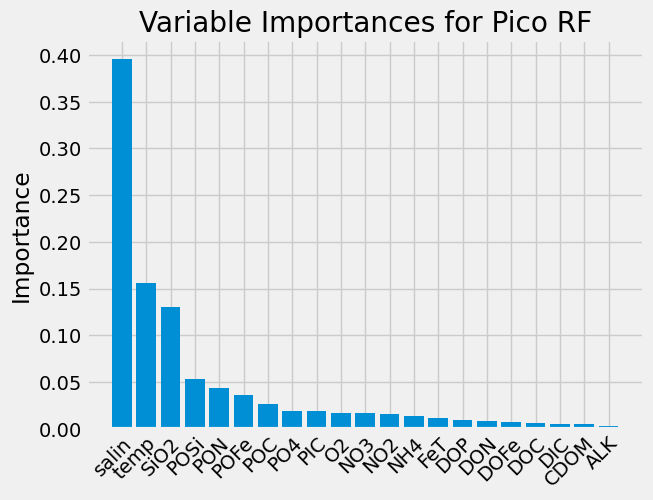

In [23]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=feature_importance.index,height=feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pico RF');

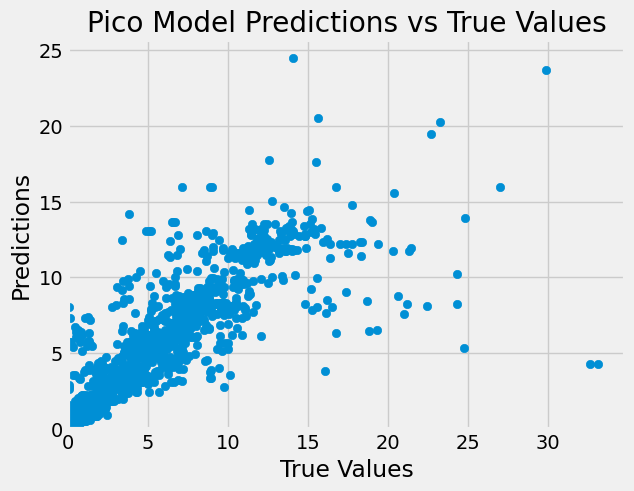

In [24]:
fig, ax = plt.subplots()
ax.scatter(test_labels, predictions)
ax.set_title('Pico Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()

# run the model on each individual populaton - see which does best
#put zero values when 